---

# **Insurace Claim Prediction (Machine-Learning)**

---

#### **Importing Required Libraries**

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

---

### **1. Data Collection :**

#### **Load dataset**

In [40]:
data=pd.read_csv("insurance3r2.csv")

In [41]:
data.head()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1


---

### **2. Data Preprocessing :**

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   steps           1338 non-null   int64  
 4   children        1338 non-null   int64  
 5   smoker          1338 non-null   int64  
 6   region          1338 non-null   int64  
 7   charges         1338 non-null   float64
 8   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


In [43]:
data.shape

(1338, 9)

In [44]:
data=data.dropna()

In [45]:
data['region'].unique()

array([3, 2, 1, 0], dtype=int64)

In [46]:
data.describe()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,5328.623318,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,2453.643236,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,3000.000000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,3008.000000,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,4007.000000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,8004.000000,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,10010.000000,5.000000,1.000000,3.000000,63770.428010,1.000000


- age	: Age of the insured person
- sex	: Gender of the person (Male/Female)
- bmi	: Body Mass Index (BMI), a measure of body fat based on height and weight
- children	: Number of dependent children
- smoker	: Whether the person is a smoker (Yes/No)
- region	: Geographic region where the person lives (Southwest, Southeast, Northwest, Northeast)
- steps	: Average daily steps taken by the individual
- charges	: Medical charges incurred by the insured person
- claim	: Whether the person made an insurance claim (1 = Yes, 0 = No)

#### **Exploratory Data Analysis (EDA)**

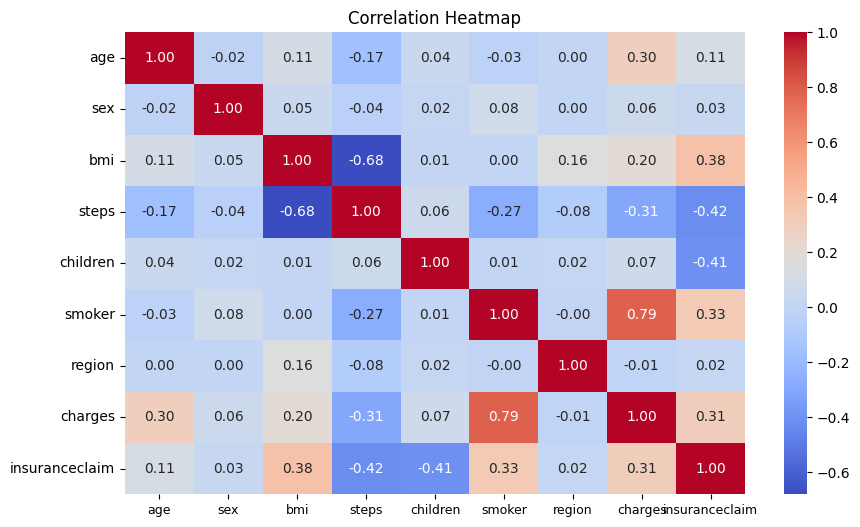

In [47]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.xticks(rotation=0,fontsize=9)
plt.title("Correlation Heatmap")
plt.show()

#### **Correlation Heatmap Summary :**  

- **Smoker & Charges (0.79)** → Strong positive correlation.  
- **BMI & insuranceclaim (0.38)** → Moderate positive correlation.  
- **BMI & Steps (-0.68)** → Strong negative correlation.  
- **Insurance Claim** correlates with bmi (0.38),  smoker (0.33), and  charges (0.31).  
- Most other correlations are weak.  


#### **Smoker vs Charges :**

C:\Users\Nisarg patel\AppData\Local\Temp\ipykernel_888\4034044337.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data["smoker"], y=data["charges"], palette="coolwarm")


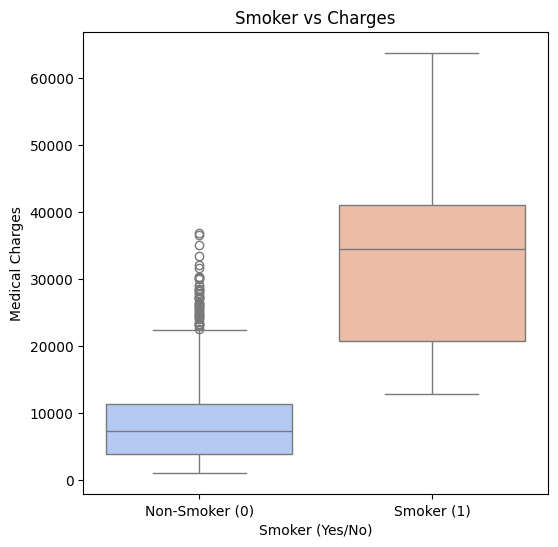

In [48]:
plt.figure(figsize=(6, 6))
sns.boxplot(x=data["smoker"], y=data["charges"], palette="coolwarm")
plt.xticks(ticks=[0, 1], labels=["Non-Smoker (0)", "Smoker (1)"])
plt.xlabel("Smoker (Yes/No)")
plt.ylabel("Medical Charges")
plt.title("Smoker vs Charges")
plt.show()


- **Smokers tend to have significantly higher medical charges.**

#### **BMI vs Charges :**

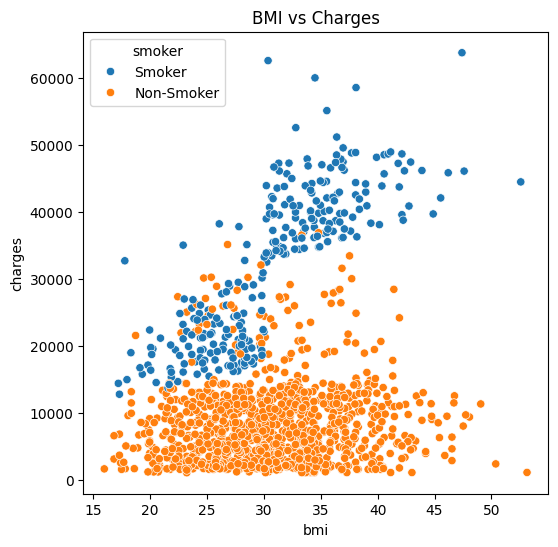

In [49]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=data['bmi'], y=data['charges'], hue=data['smoker'].replace({0: "Non-Smoker", 1: "Smoker"}))
plt.title("BMI vs Charges")
plt.show()

- **Higher BMI generally leads to higher charges, especially among smokers.**

#### **Age vs Charges :**

Text(0.5, 1.0, 'Age vs Charges')

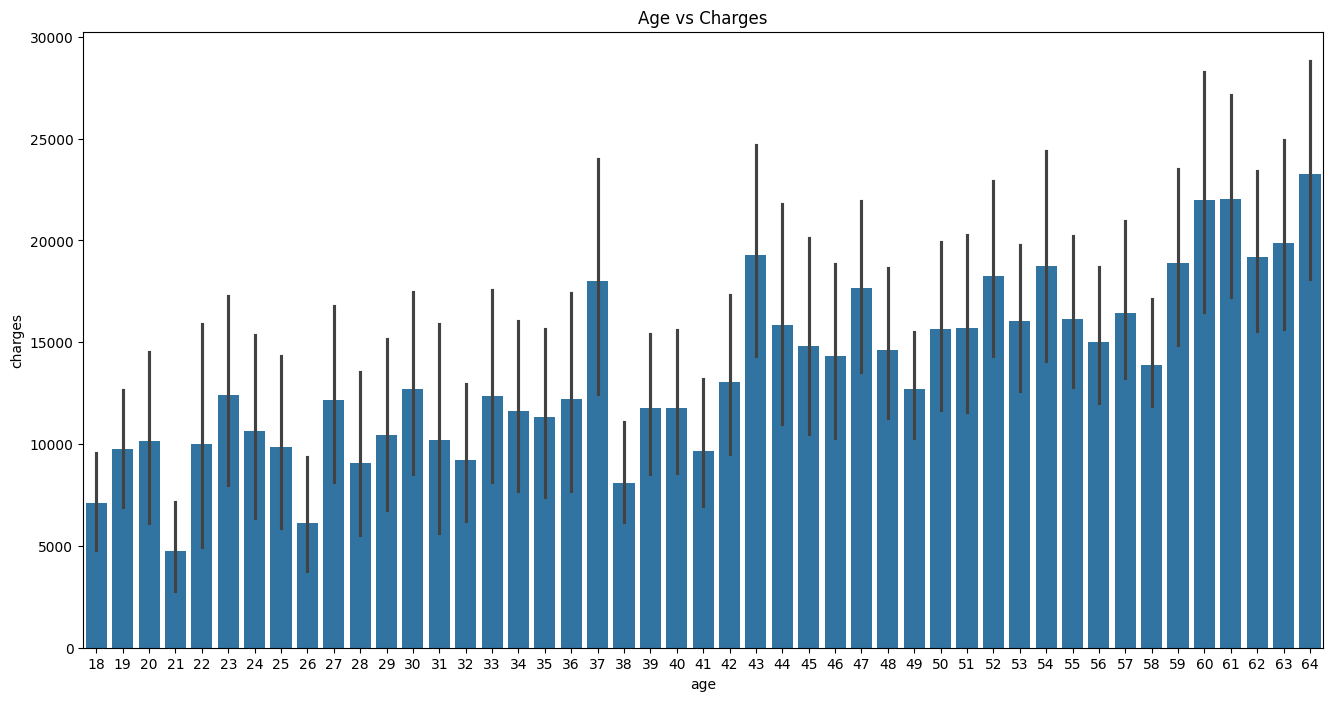

In [50]:
plt.figure(figsize = (16, 8))
sns.barplot(x = 'age', y = 'charges', data = data)
plt.title("Age vs Charges")

- **Medical charges generally increase with age, indicating higher health risks and medical expenses, leading to higher insurance costs for older individuals.**

#### **Sex vs Charges :**

C:\Users\Nisarg patel\AppData\Local\Temp\ipykernel_888\2686059725.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='sex', y='charges', data=data, palette="coolwarm")


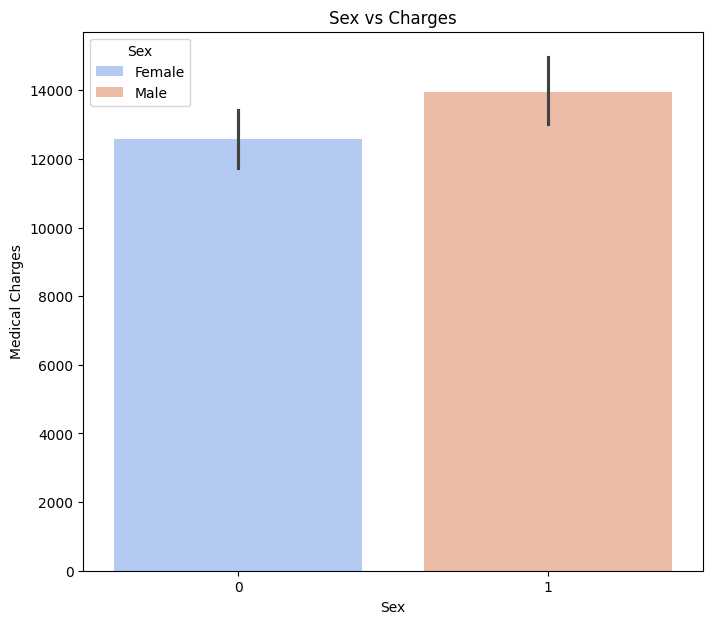

In [51]:
plt.figure(figsize=(8, 7))
ax = sns.barplot(x='sex', y='charges', data=data, palette="coolwarm")
plt.title("Sex vs Charges")
plt.xlabel("Sex")
plt.ylabel("Medical Charges")
legend_labels = ["Female", "Male"]
plt.legend(ax.patches, legend_labels, title="Sex", loc="upper left")
plt.show()


- **Males tend to have higher medical charges than females**

#### **Define features (X) and target (Y)**

In [52]:
X=data.iloc[:,:-1]
X.head()

,age,sex,bmi,steps,children,smoker,region,charges
0,19,0,27.900,3009,0,1,3,16884.92400
1,18,1,33.770,3008,1,0,2,1725.55230
2,28,1,33.000,3009,3,0,2,4449.46200
3,33,1,22.705,10009,0,0,1,21984.47061
4,32,1,28.880,8010,0,0,1,3866.85520


In [53]:
X.shape


(1338, 8)

In [54]:
Y=data.iloc[:,-1]
Y.head()

0    1
1    1
2    0
3    0
4    1
Name: insuranceclaim, dtype: int64

In [55]:
Y.shape

(1338,)

##### **Split data into train and test sets :**

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [57]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

---

### **3. Model Training :**

##### **Train a Random Forest model :**

In [58]:
rfmodel= RandomForestClassifier()
rfmodel.fit(X_train, y_train)
ypred=rfmodel.predict(X_test)
print(confusion_matrix(y_test,ypred))

[[155   6]
 [ 14 227]]


In [59]:
X_test.shape

(402, 8)

In [60]:
y_test.shape

(402,)

In [61]:
X_train.shape

(936, 8)

In [62]:
y_train.shape

(936,)

**model is already performing well, No need to hypertuning.**

---

### **4. Model Evaluation :**

In [63]:
y_pred = rfmodel.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Model Accuracy: 0.6691542288557214
Confusion Matrix:
 [[ 44 117]
 [ 16 225]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.27      0.40       161
           1       0.66      0.93      0.77       241

    accuracy                           0.67       402
   macro avg       0.70      0.60      0.59       402
weighted avg       0.69      0.67      0.62       402



e:\AI_ML\Fiinal_Projects\New folder\myvenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [64]:
acc=cross_val_score(estimator=rfmodel,X=X_train,y=y_train,cv=10)
acc.mean()

0.962617250057195

In [65]:
acc.std()

0.017357784752511225

The model has **70% accuracy**, performs well in predicting claims (**high recall for Class 1: 0.90**), but struggles with non-claims (**low recall for Class 0: 0.40**), indicating a need for **better class balance handling or feature optimization**.

---

### **5. Deployment**

##### **Saving model to disk :**

In [66]:
pickle.dump(rfmodel, open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))
scaler=pickle.dump(scaler, open('scaler.pkl', "wb"))

---